In [19]:
%pylab inline
import torch
# Making sure we can find the data loader
import sys
sys.path.append('..')
sys.path.append('../..')
from data import load 

Populating the interactive namespace from numpy and matplotlib


/Users/hudaqureshi/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['load']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [22]:
# Let's load the dataset
# Since we are using an network comprised of linear layers important to 
# keep resolution low 

# TODO: Read through the load.py script to understand this 
train_data, train_label = load.get_dogs_and_cats_data(resize=(32,32), 
                                                      n_images=100)
# TODO: What is input size here? 
input_size = 32*32*3
to_image = load.to_image_transform()

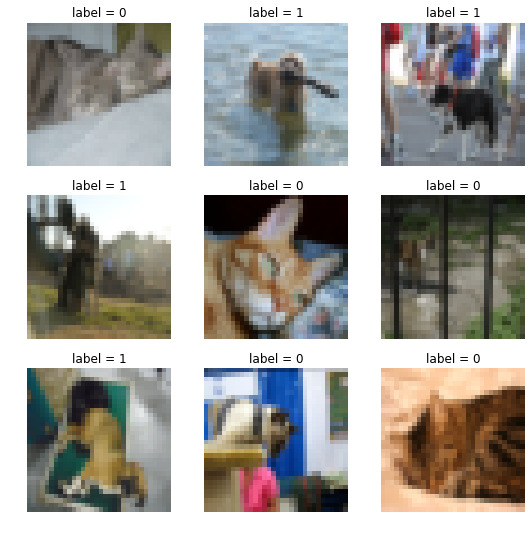

In [23]:
figure(figsize=(9,9))

# Plot the first 9 images (all cats)

for i, (data, label) in enumerate(zip(train_data[:9], train_label[:9])):
    subplot(3, 3, 1+i)
    imshow(to_image(data))
    title('label = %d' %label)
    axis('off')

In [26]:
# TODO: What is torch.nn.Module and why is the second cell net1 = Network(100)
# TODO: What exactly does that mean, what does n_hidden mean?
class Network1(torch.nn.Module): 
    def __init__(self, n_hidden=100): 
        super().__init__()
        self.linear1 = torch.nn.Linear(input_size, n_hidden)
        self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(n_hidden, 1)
        
    # TODO: Recall what forward function is 
    def forward(self, x): 
        return self.linear2(self.activation(
            self.linear1(x.view(x.size(0), -1))))

In [25]:
# Create the network 
net1 = Network1(100)

# Run an image through it
# Detach takes away the tensor label and prints it as a flat numpy array with the 
# .numpy() and view(-1) just prints out the entire array I guess to save space
print( net1(train_data).view(-1).detach().numpy() )

[-0.18937396 -0.10509678 -0.09996623 -0.12351544 -0.12294287 -0.16406263
 -0.14281066 -0.14724492  0.03104426 -0.16803698 -0.13442123 -0.01812811
 -0.10819408 -0.11910333 -0.14701411 -0.12331596 -0.19327669 -0.21690582
 -0.13791381 -0.04752999 -0.09125456 -0.06960934 -0.21167259 -0.12109469
 -0.08093089 -0.08976668 -0.08484624 -0.10782012 -0.24925597 -0.11955325
 -0.0117421  -0.05441741 -0.06848594 -0.15733574 -0.15441273 -0.04015763
 -0.07608574 -0.14463682 -0.10895924 -0.2226626  -0.1136042  -0.00182838
 -0.15328524 -0.17024519 -0.09209049 -0.18876757 -0.12610392 -0.1298753
 -0.059271   -0.17459358 -0.19661988 -0.15343732 -0.17606185 -0.06509128
 -0.174975   -0.06319705 -0.09690823 -0.07156203 -0.01981764 -0.1347979
 -0.09419284 -0.07348178 -0.0567688  -0.09387326 -0.04998128 -0.08881047
 -0.00895185 -0.17514756 -0.13691108 -0.12358066 -0.17003466 -0.1799325
 -0.10736016 -0.23912744 -0.15818028 -0.12250649 -0.08368194 -0.12849492
 -0.07863916 -0.08330279 -0.12550724 -0.19210811 -0.08

In [41]:
# TODO: Understand why this cell and the next are different. 
# The following is the code he does in the html notebook, and it 
# produces a different graph than whatever is produced in his video 
# from his video code. What's the difference and why? 
class Network2(torch.nn.Module): 
    
    # The *hidden_size means that you take in a list of arguments; thus, you can give 
    # as many arguments to the __init__ function as you want 
    def __init__(self, *hidden_size): 
        super().__init__()
        layers = [] 
        
        # Add the hidden layers
        n_in = input_size
        
        for n_out in hidden_size: 
            layers.append(torch.nn.Linear(n_in, n_out))
            layers.append(torch.nn.ReLU())
            n_in = n_out
            
        # Add the classifier
        layers.append(torch.nn.Linear(n_out, 1))
        self.network = torch.nn.Sequential(*layers)
        
    def forward(self, x): 
        return self.network(x.view(x.size(0), -1))


In [42]:
# Create the network 
net2 = Network2(100, 50, 50)

# Run an image through it
print( net2(train_data).view(-1).detach().numpy())

[-0.0463715  -0.0226232  -0.03773692 -0.02100416 -0.04192822 -0.04583639
 -0.03354549 -0.04080059 -0.03970706 -0.03510368 -0.03630325 -0.04272726
 -0.03673615 -0.02009617 -0.03938565 -0.03400549 -0.04769716 -0.02857375
 -0.03730073 -0.02767092 -0.01515144 -0.0494968  -0.04573983 -0.04373367
 -0.02978896 -0.02759041 -0.03167826 -0.04125412 -0.01929456 -0.03140577
 -0.06348012 -0.0068984  -0.04662983 -0.04692982 -0.03413125 -0.05362812
 -0.04619706 -0.0383983  -0.04349676 -0.0410489  -0.03954159 -0.04849499
 -0.02282326 -0.04566661 -0.0299518  -0.03193262 -0.03260358 -0.04186036
 -0.05003272 -0.034421   -0.04274403 -0.03432441 -0.03813084 -0.04378841
 -0.04178531 -0.04050928 -0.04849373 -0.04067104 -0.03723744 -0.06591062
 -0.04107471 -0.041513   -0.04564728 -0.05012801 -0.04024477 -0.0407436
 -0.06376692 -0.01832334 -0.04833829 -0.0304828  -0.03964029 -0.04309506
 -0.0207381  -0.03419863 -0.03823771 -0.03219731 -0.01379725 -0.01140116
 -0.04234043 -0.0334269  -0.03491807 -0.00145733 -0.

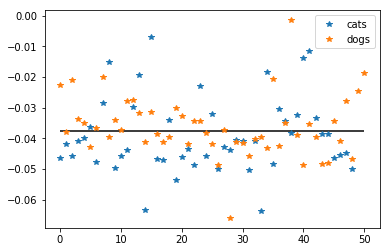

In [43]:
plot( net2(train_data[train_label == 0]).view(-1).detach().numpy(), 
    '*', label='cats')
plot( net2(train_data[train_label == 1]).view(-1).detach().numpy(), 
    '*', label='dogs')
hlines(net2(train_data).mean(), 0, 50)
legend()

[0.1013862  0.09138633 0.11088158 0.10382952 0.10477944 0.10760374
 0.1142652  0.11095287 0.08969127 0.10453371 0.09722507 0.09811725
 0.11179538 0.11163482 0.1018126  0.10536774 0.09440181 0.09864108
 0.10080762 0.10987937 0.11322512 0.11133068 0.11118408 0.11223377
 0.10368299 0.09322612 0.10285413 0.107925   0.10618354 0.09377912
 0.10726783 0.10628111 0.1063313  0.11359316 0.11122288 0.09463676
 0.12483464 0.0977929  0.10665194 0.11110228 0.11591373 0.1101447
 0.10317042 0.10222153 0.10705648 0.10483833 0.10334381 0.10441677
 0.11974301 0.09874047 0.11867272 0.10902641 0.11288418 0.09509605
 0.11009622 0.10819884 0.10332344 0.1034675  0.09990729 0.11370552
 0.10916901 0.10343564 0.09970906 0.10056256 0.11502518 0.11002177
 0.11411896 0.08898967 0.10922556 0.10021205 0.11366713 0.10953122
 0.10692635 0.09846444 0.10291931 0.10750046 0.09543744 0.10337987
 0.10060093 0.09631959 0.10378386 0.09763699 0.10037245 0.10121714
 0.11994445 0.09444541 0.10744752 0.1027907  0.10639317 0.10338

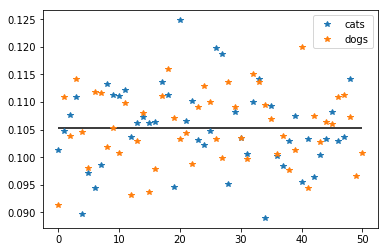

In [44]:
# TODO: Understand why this cell and the next are different. 
# The following is the code he does in the video 
class Network2(torch.nn.Module): 
    
    # The *hidden_size means that you take in a list of arguments; thus, you can give 
    # as many arguments to the __init__ function as you want 
    def __init__(self, *hidden_size): 
        super().__init__()
        layers = [] 
        
        # Add the hidden layers
        n_in = input_size
        
        for n_out in hidden_size: 
            layers.append(torch.nn.Linear(n_in, n_out))
            layers.append(torch.nn.ReLU())
            n_in = n_out
            
        # Add the classifier
        self.network = torch.nn.Sequential(*layers)
        self.classifier = torch.nn.Linear(n_out, 1)

        
    def forward(self, x): 
        return self.classifier(self.network(x.view(x.size(0), -1)))
    
# Create the network 
net2 = Network2(100, 50, 50)

# Run an image through it
print( net2(train_data).view(-1).detach().numpy())

plot( net2(train_data[train_label == 0]).view(-1).detach().numpy(), 
    '*', label='cats')
plot( net2(train_data[train_label == 1]).view(-1).detach().numpy(), 
    '*', label='dogs')
hlines(net2(train_data).mean(), 0, 50)
legend()